<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_24_Tinder_Millennial_Match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement : Predict if the relationship succeeded or not**


**About the Data**

The dataset contains information about  the match rate of the individuals from different universities, and whether the app (i.e. Tinder) has helped them find a relationship.

Data Description

* ID : User id
* Segment type : Medium of Usage
* Segment Description : Name of Universities
* Answer : Do you use tinder ?
* Count : Number of Matches
* Percentage : % of matches
* It became a relationship : Success of relationship **(Target)**

## Loading Libraries

In [1]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipulation tool

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Training Dataset

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/train_set_label.csv")

In [4]:
train_data.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0


## Loading Test Dataset

In [5]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/test_set_label.csv')

In [6]:
test_data.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage
0,292974.2311,university,"University of California, Davis",Yes,0.230742,0.115371
1,292889.7996,web,"Meridian, Idaho",No,0.000000,0.000000
2,293724.0350,university,"Westport, CT",Yes,0.000000,0.000000
3,292884.0724,mobile,"Meridian, Idaho",No,1497.699982,0.388752
4,292882.0964,mobile,"Meridian, Idaho",No,1439.464988,0.373646


## Basic EDA

In [7]:
train_data.shape

(1896, 7)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1896 non-null   float64
 1   Segment type              1896 non-null   object 
 2   Segment Description       1896 non-null   object 
 3   Answer                    1896 non-null   object 
 4   Count                     1896 non-null   float64
 5   Percentage                1896 non-null   float64
 6   It became a relationship  1896 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 103.8+ KB


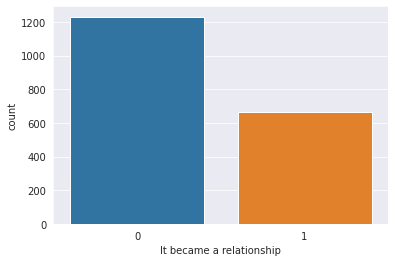

In [11]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(train_data['It became a relationship'])

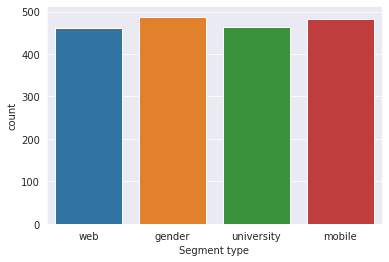

In [12]:
sns.countplot(train_data['Segment type'])

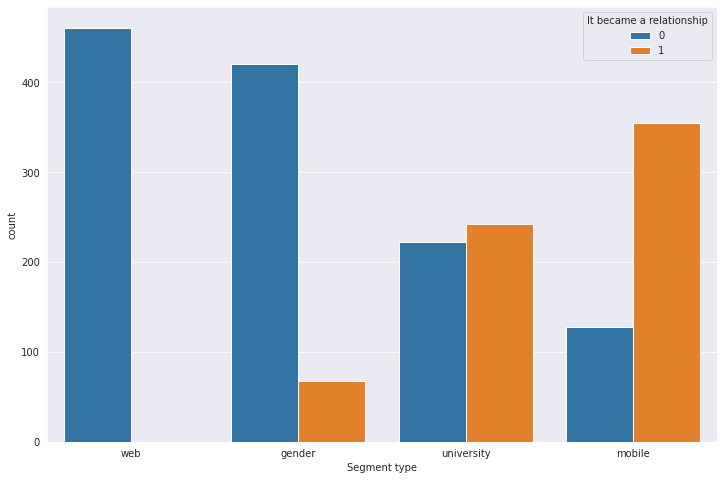

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(x = 'Segment type',data=train_data,hue='It became a relationship')
plt.show()

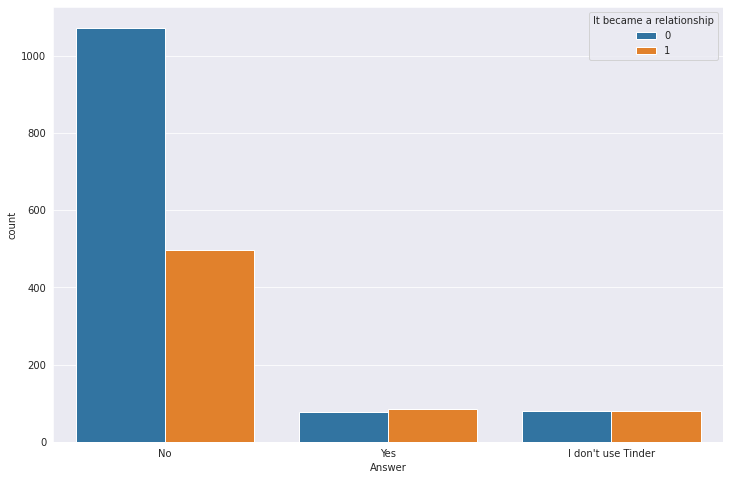

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(x = 'Answer',data=train_data,hue='It became a relationship')
plt.show()

In [31]:
test_data['Answer'].unique()

array(['Yes', 'No', "I don't use Tinder"], dtype=object)

In [17]:
def split_segment1(x):
  seg = x.split(",")
  return seg[0]

#
def split_segment2(x):
  seg = x.split(",")
  return seg[-1]

In [18]:
train_data['Segmnet_1'] = train_data['Segment Description'].apply(lambda x : split_segment1(x))
train_data['Segmnet_2'] = train_data['Segment Description'].apply(lambda x : split_segment2(x))

In [26]:
test_data['Segmnet_1'] = test_data['Segment Description'].apply(lambda x : split_segment1(x))
test_data['Segmnet_2'] = test_data['Segment Description'].apply(lambda x : split_segment2(x))

In [19]:
train_data.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship,Segmnet_1,Segmnet_2
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0,Meridian,Idaho
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0,Meridian,Idaho
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0,Meridian,Idaho
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0,Meridian,Idaho
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0,Meridian,Idaho


In [21]:
train_data.Segmnet_1.nunique(),train_data.Segmnet_2.nunique()

(143, 148)

In [24]:
train_data.ID.nunique(),test_data.ID.nunique()

(1888, 631)

In [25]:
train_data.shape,test_data.shape

((1896, 9), (632, 6))

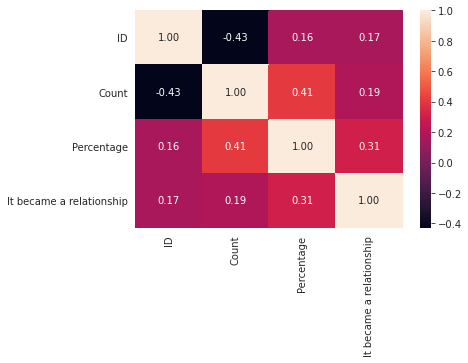

In [28]:
sns.heatmap(train_data.corr(),annot=True,fmt=".2f")

In [49]:
cat_cols =  [col for col in train_data.columns if train_data[col].dtypes == 'O']
cat_cols

['Segment type', 'Answer', 'Segmnet_1', 'Segmnet_2']

In [44]:
cat_features_index = np.where(train_data.dtypes == object)[0]
cat_features_index

array([1, 2, 6, 7])

In [33]:
!pip install catboost

     |████████████████████████████████| 65.8MB 78kB/s 


In [34]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

In [35]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

In [42]:
test_data.drop('Segment Description',axis=1,inplace=True)
train_data.drop('Segment Description',axis=1,inplace=True)

In [47]:
#differentiate traget from features
X = train_data.drop('It became a relationship',axis=1)
Y = train_data['It became a relationship']

In [36]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

## Hyperparameter Otimization using Grid search

In [50]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.0001,0.005, 0.01],
    'n_estimators': [500,1000,1500,2000],
    'random_state' : [42,100,500,720]
    }
catboost = CatBoostClassifier()
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y,cat_features = cat_cols)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 12.7min finished


0:	learn: 0.6856540	total: 51.6ms	remaining: 1m 17s
1:	learn: 0.6781039	total: 55ms	remaining: 41.2s
2:	learn: 0.6700925	total: 57.9ms	remaining: 28.9s
3:	learn: 0.6618781	total: 61.2ms	remaining: 22.9s
4:	learn: 0.6531360	total: 64.4ms	remaining: 19.2s
5:	learn: 0.6458069	total: 67.2ms	remaining: 16.7s
6:	learn: 0.6382365	total: 69.8ms	remaining: 14.9s
7:	learn: 0.6317397	total: 72.2ms	remaining: 13.5s
8:	learn: 0.6253480	total: 74.1ms	remaining: 12.3s
9:	learn: 0.6178938	total: 76.6ms	remaining: 11.4s
10:	learn: 0.6107374	total: 79.4ms	remaining: 10.7s
11:	learn: 0.6038422	total: 82.3ms	remaining: 10.2s
12:	learn: 0.5972254	total: 84.6ms	remaining: 9.68s
13:	learn: 0.5922972	total: 86.8ms	remaining: 9.21s
14:	learn: 0.5857538	total: 89.7ms	remaining: 8.88s
15:	learn: 0.5792545	total: 92.7ms	remaining: 8.6s
16:	learn: 0.5721889	total: 95.9ms	remaining: 8.37s
17:	learn: 0.5688272	total: 97.9ms	remaining: 8.06s
18:	learn: 0.5631463	total: 101ms	remaining: 7.88s
19:	learn: 0.5565853	tota

## Applying Stratified KFold Split

Streaming output truncated to the last 5000 lines.
1008:	learn: 0.1411675	total: 2.19s	remaining: 1.07s
1009:	learn: 0.1411652	total: 2.19s	remaining: 1.06s
1010:	learn: 0.1410872	total: 2.19s	remaining: 1.06s
1011:	learn: 0.1410302	total: 2.2s	remaining: 1.06s
1012:	learn: 0.1409880	total: 2.2s	remaining: 1.06s
1013:	learn: 0.1409281	total: 2.2s	remaining: 1.06s
1014:	learn: 0.1408943	total: 2.21s	remaining: 1.05s
1015:	learn: 0.1406900	total: 2.21s	remaining: 1.05s
1016:	learn: 0.1406750	total: 2.21s	remaining: 1.05s
1017:	learn: 0.1406502	total: 2.22s	remaining: 1.05s
1018:	learn: 0.1406232	total: 2.22s	remaining: 1.05s
1019:	learn: 0.1406043	total: 2.22s	remaining: 1.04s
1020:	learn: 0.1405140	total: 2.22s	remaining: 1.04s
1021:	learn: 0.1404763	total: 2.23s	remaining: 1.04s
1022:	learn: 0.1404763	total: 2.23s	remaining: 1.04s
1023:	learn: 0.1404620	total: 2.23s	remaining: 1.04s
1024:	learn: 0.1404336	total: 2.23s	remaining: 1.03s
1025:	learn: 0.1402255	total: 2.23s	remaining: 1.03

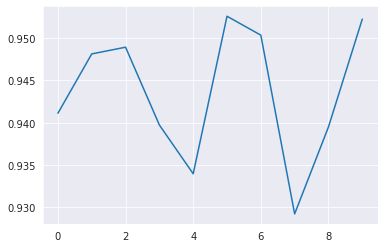

In [53]:
from sklearn.model_selection import StratifiedKFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostClassifier(learning_rate =0.005, n_estimators =1500, random_state = 42)    

        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds,average='weighted'))
        scores.append(f1_score(ytest,preds,average='weighted'))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))


In [54]:
pred = grid.best_estimator_.predict(test_data)

## Save predictions on test data

In [57]:
res = pd.DataFrame(pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("sub_catboost.csv",index=False) # the csv file will be saved locally on the same location where this notebook is located.

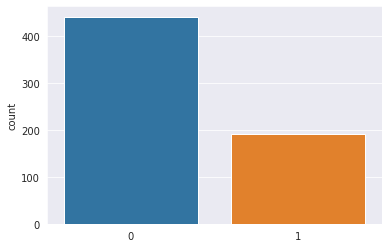

In [56]:
sns.countplot(pred)

https://dphi.tech/practice/challenge/60#leaderboard

**Basic Catboost Model Scores Submission: 95.25316455696202**